# Parallel analysis of MERRA-2 and Alpine-3D grids using `xarray` and `dask`

In [1]:
import numpy as np
import xarray as xr
from dask.distributed import Client

## Create dask cluster

In [2]:
client = Client(n_workers=12, threads_per_worker=2, memory_limit='5GB')
client

Client Scheduler: tcp://127.0.0.1:37704 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 12 Cores: 24 Memory: 60.00 GB


## Data path

In [3]:
nc_path = "/scratch/summit/erke2265/MERRA2/T2M_hourly_*.nc"
var="T2M"

## Caclulate and plot temporal mean using dask

In [4]:
%%time 
# Define chunk size and insepct dask array
ds_dask = xr.open_mfdataset(nc_path, chunks={'time': 1000}, combine='by_coords')
ds_dask[var].data

CPU times: user 578 ms, sys: 108 ms, total: 686 ms
Wall time: 3.34 s


,Array,Chunk
Bytes,81.60 GB,232.70 MB
Shape,"(350640, 101, 576)","(1000, 101, 576)"
Count,760 Tasks,360 Chunks
Type,float32,numpy.ndarray


CPU times: user 4.28 s, sys: 580 ms, total: 4.86 s
Wall time: 23.5 s


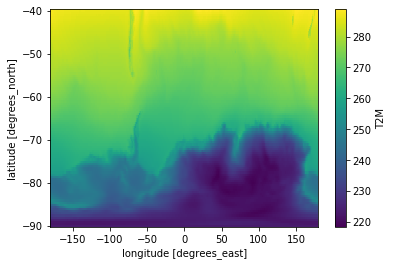

In [5]:
%%time
# Compute temporal mean and plot
ds_dask_mean = ds_dask[var].mean(dim='time')
ds_dask_mean.plot()